**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Reading Data**

In [30]:
purchase_history = pd.read_csv('purchase_history.csv')
item_to_id = pd.read_csv('item_to_id.csv')

In [31]:
purchase_history.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [32]:
item_to_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [33]:
item_to_id.shape

(48, 2)

In [34]:
purchase_history.dtypes

user_id     int64
id         object
dtype: object

In [35]:
item_to_id.dtypes

Item_name    object
Item_id       int64
dtype: object

In [37]:
purchase_history = purchase_history.set_index(purchase_history.columns.drop('id',1).tolist()).id.str.split(',', expand = True).stack().reset_index().rename(columns={0:'id'}).loc[:, purchase_history.columns]

In [38]:
purchase_history.columns = ['user_id', 'item_id']
item_to_id.columns = ['item_name', 'item_id']

In [39]:
purchase_history['item_id'] = purchase_history['item_id'].astype('int')
purchase_history.head()

,user_id,item_id
0,222087,27
1,222087,26
2,1343649,6
3,1343649,47
4,1343649,17


In [40]:
users_items = purchase_history.merge(item_to_id, on = 'item_id')

In [41]:
users_items.head()

,user_id,item_id,item_name
0,222087,27,dishwashing
1,404134,27,dishwashing
2,987613,27,dishwashing
3,60201,27,dishwashing
4,1166671,27,dishwashing


In [50]:
top_items=pd.DataFrame(users_items.item_name.value_counts())
top_items = top_items.reset_index()
top_items.columns = ['item_name', 'item_count']
top_items = top_items.sort_values(by = 'item_count', ascending=False)
top_items[0:10]

,item_name,item_count
0,lettuce,14473
1,sugar,9119
2,cucumbers,9050
3,cherries,9019
4,apples,9008
5,broccoli,8980
6,grapefruit,8951
7,bananas,8921
8,cauliflower,8902
9,berries,8878


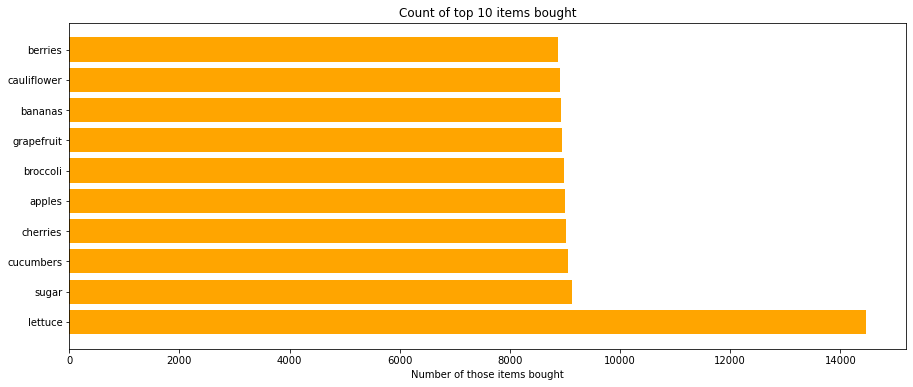

In [56]:
plt.figure(figsize=(15, 6))
plt.title('Count of top 10 items bought')
plt.barh(range(0,10), top_items['item_count'][0:10], color='orange', align='center')
plt.yticks(range(0,10), [i for i in top_items.item_name[0:10]])
plt.xlabel('Number of those items bought')
plt.show()

In [60]:
#top 10 users based on the number of products they bought

top_users = pd.DataFrame(users_items.user_id.value_counts())
top_users = top_users.reset_index()
top_users.columns = ['user_id', 'items_bought']
top_users = top_users.sort_values(by = 'items_bought', ascending=False)
top_users[0:10]

,user_id,items_bought
0,269335,72
1,367872,70
2,599172,64
3,397623,64
4,377284,63
5,917199,62
6,1485538,62
7,718218,60
8,653800,60
9,828721,58


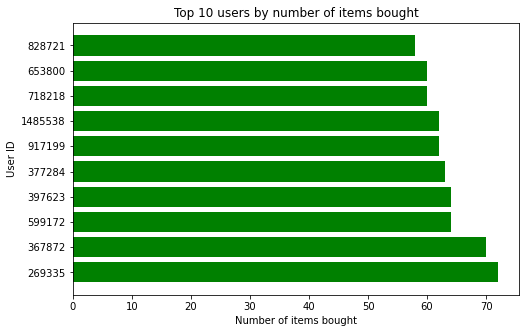

In [64]:
plt.figure(figsize=(8, 5))
plt.title('Top 10 users by number of items bought')
plt.barh(range(0,10), top_users['items_bought'][0:10], color='green', align='center')
plt.yticks(range(0,10), [i for i in top_users.user_id[0:10]])
plt.xlabel('Number of items bought')
plt.ylabel('User ID')
plt.show()

In [66]:
#Taking unique items 
list_items = list(users_items.item_id.unique())

In [67]:
# dataframe that contains highest cpount of each product by a particular customer
# Creating table with item ids and all
df = pd.DataFrame({'item_id' : np.nan, 'user_id' : np.nan, 'item_highest_count' : np.nan}, index = range(0,48))

In [68]:
i = 0
for j in list_items:
  df1 = users_items[users_items['item_id']==j].user_id.value_counts().reset_index()
  df1.columns = ['user_id', 'item_count']
  df.iloc[i,0] = j
  df.iloc[i,1] = df1.iloc[0,0]
  df.iloc[i,2] = df1.iloc[0,1]
  i = i + 1

In [69]:
df['item_id'] = df['item_id'].astype('int')
df['user_id'] = df['user_id'].astype('int')
df['item_highest_count'] = df['item_highest_count'].astype('int')

In [70]:
# Merging count of highest items w.r.t user id
a = pd.merge(df, item_to_id,on='item_id')

In [71]:
a

,item_id,user_id,item_highest_count,item_name
0,27,956666,4,dishwashing
1,26,1341188,4,spaghetti sauce
2,6,334664,4,poultry
3,47,1374100,4,pork
4,17,366155,4,beef
5,18,917199,5,laundry detergent
6,12,791038,3,shampoo
7,23,920002,5,tea
8,22,1199670,4,frozen vegetables
9,43,996380,4,coffee


In [72]:
users_items = users_items.drop(columns = ['item_name'])
users_items = users_items.reset_index()
users_items = users_items.groupby(['user_id', 'item_id']).index.count().reset_index()
users_items.columns = ['user_id', 'item_id', 'count']

In [73]:
users_items

,user_id,item_id,count
0,47,2,1
1,47,3,1
2,47,4,1
3,47,13,1
4,47,15,1
...,...,...,...
290553,1499974,25,1
290554,1499974,31,1
290555,1499974,34,1
290556,1499974,37,1


In [74]:
user_item_count_matrix = users_items.pivot(index='item_id', columns='user_id', values = 'count')

In [76]:
user_item_count_matrix

In [78]:
#imputing null values with 0

user_item_count_matrix = user_item_count_matrix.fillna(0)

In [79]:
user_item_count_matrix

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
similarity_matrix = cosine_similarity(user_item_count_matrix, user_item_count_matrix)

In [83]:
item_similarity = similarity_matrix.copy()
pca = PCA()
items_rotated = pca.fit_transform(item_similarity)

In [84]:
items_rotated = pd.DataFrame(items_rotated, index=user_item_count_matrix.index, columns=["pc{}".format(index+1) for index in range(0,item_to_id.shape[0])])

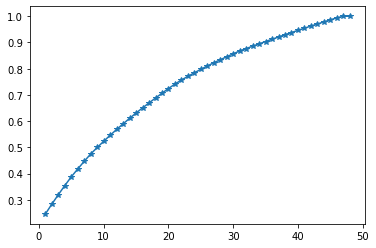

In [85]:
# show the total variance which can be explained by first K principle components
explained_variance_by_k = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1,len(explained_variance_by_k)+1),explained_variance_by_k,marker="*")

In [86]:
item_to_id.index = item_to_id.item_id
item_to_id = item_to_id.drop(columns = ['item_id'])

In [87]:
#function to plot clusters using pc1 and pc2 pca components on 2D

def show_clusters(items_rotated,labels):
   
    #plot and print clustering result
    fig = plt.figure(figsize=(15, 10))

    #endless cycle iterator
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])
    print('Labels are :', end = ' ')
    print(labels)
    grps = items_rotated.groupby(labels)
    i = 1
    for label,grp in grps:
      plt.scatter(grp.pc1,grp.pc2,c=next(colors),label = label)
      print('Cluster:', end = ' ')
      print(i)
      i = i+1
      print('\n')
      names = item_to_id.loc[grp.index,"item_name"]
      for index, name in enumerate(names):
        print(index+1,name)
      print('\n')  

     #annotate
    for itemid in items_rotated.index:
      x = items_rotated.loc[itemid,"pc1"]
      y = items_rotated.loc[itemid,"pc2"]
      name = item_to_id.loc[itemid,"item_name"]
      name = re.sub('\W', ' ', name)
      plt.text(x,y,name)
      plt.tight_layout()

      plt.legend(loc="best")

In [88]:
#function that takes in number of clusters and calls the plot function to plot the clusters

def cluster(n_clusters,n_components=48):
  
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(items_rotated.values[:, :])
   
    # display results on a plot
    show_clusters(items_rotated, kmeans.labels_)

In [89]:
#using K emans for different number of clusters and trying to find the right number of clusters

#chose number of clusters
inertias = []
silhouettes = []
#check the number of clusters between 2 and 25 ( won't take into consideration more than that)
k_clusters = range(2,25)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(items_rotated)
    inertias.append(kmeans.inertia_)  #append intertia scores
    silhouettes.append(silhouette_score(items_rotated, kmeans.predict(items_rotated)))  #append silhouette scores

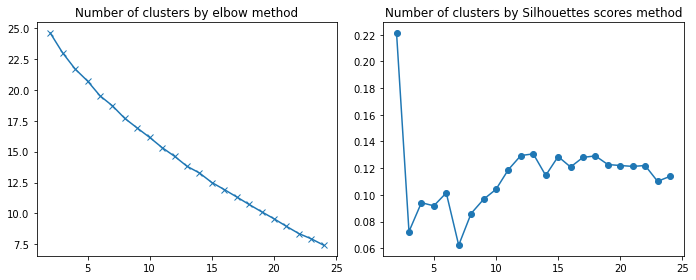

In [90]:
#to use elbow
fig = plt.figure(figsize=(10,4))
fig.add_subplot(1,2,1)
plt.title('Number of clusters by elbow method')
plt.plot(k_clusters,inertias,marker='x')# want to use elbow method to find best k

#to use silhouettes 
fig.add_subplot(1,2,2)
plt.title('Number of clusters by Silhouettes scores method')
plt.plot(k_clusters,silhouettes,marker='o')# the higher the better
plt.tight_layout()

Labels are : [1 9 1 0 3 1 2 7 1 9 3 5 6 7 2 7 1 8 5 4 7 1 1 2 4 8 8 8 5 3 3 4 2 6 5 8 6
 1 6 4 8 9 1 9 9 4 1 7]
Cluster: 1


1 baby items


Cluster: 2


1 sugar
2 pet items
3 poultry
4 soda
5 beef
6 frozen vegetables
7 tea
8 juice
9 coffee
10 pork


Cluster: 3


1 sandwich bags
2 aluminum foil
3 paper towels
4 toilet paper


Cluster: 4


1 waffles
2 cereals
3 flour
4 pasta


Cluster: 5


1 grapefruit
2 cherries
3 apples
4 berries
5 bananas


Cluster: 6


1 shampoo
2 shaving cream
3 hand soap
4 soap


Cluster: 7


1 bagels
2 tortillas
3 dinner rolls
4 sandwich loaves


Cluster: 8


1 butter
2 eggs
3 milk
4 cheeses
5 yogurt


Cluster: 9


1 laundry detergent
2 spaghetti sauce
3 dishwashing 
4 canned vegetables
5 ice cream
6 ketchup


Cluster: 10


1 lettuce
2 carrots
3 cucumbers
4 broccoli
5 cauliflower




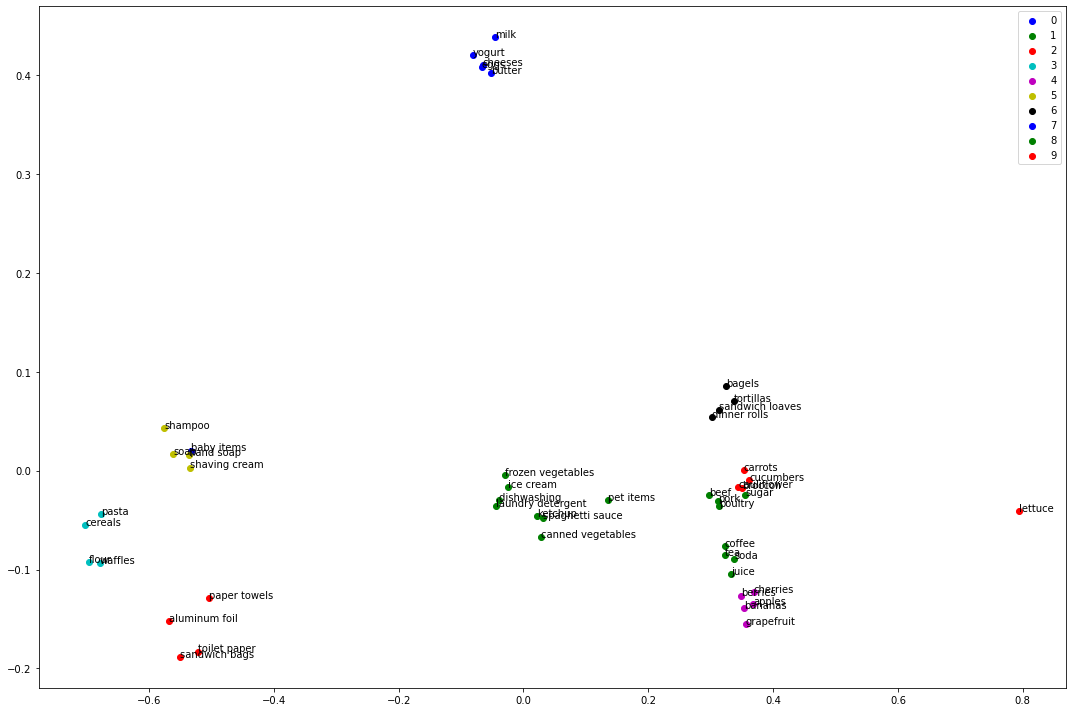

In [91]:
import re
from collections import Counter
import itertools
cluster(n_clusters=10)